Download the MNIST dataset for multiclass classification of handwritten digits. Implement the kernel Perceptron from scratch and run it to train 10 binary classifiers, one for each of the 10 digits (one-vs-all encoding), using the polynomial kernel. In order to extract a binary classifier, do the following: run the algorithm for a given number of epochs (e.g., cycles over the entire training data) on a random permutation of the training set and collect the ensemble of predictorsused by the Perceptron when predicting each training datapoint . Then use:

- the average of the predictors in the ensemble;
- the predictor achieving the smallest training error among those in the ensemble.

Based on the given split of the data in training and test set, evaluate the multiclass classification performance (zero-one loss) for different values of the number of epochs (go up to at least 10 epochs) and the degree of the polynomial (go up to at least degree 6). In order to use the 10 binary classifiers to make multiclass predictions, use the fact that binary classifiers trained by the Perceptron have the form _argmax gixi_ and predict using  wherecorresponds to the binary classifier for class.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
#dataset MNIST
dataset = pd.read_csv("mnist_test.csv")
dataset.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#divide the data domain from the label set 
X = dataset.drop(["label"], axis =1).values

In [4]:
#look at the data domain
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
#extracting the label set 
Y = dataset[["label"]].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [7]:
#train and test split 
np.random.seed(67)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.4, stratify = Y)

In [8]:
y_train

array([[5],
       [9],
       [6],
       ...,
       [6],
       [0],
       [2]])

In [9]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
#Apply OneHotEncoder
encoder = OneHotEncoder(sparse=False)

In [11]:
#apply the one-hot encoder at the train 
y_train = encoder.fit_transform(y_train)

/Users/margheritamaroni/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Since we have a binary label set {-1, 1}, we want the 0 to become -1.


In [12]:
y_train[y_train == 0] = -1

In [13]:
y_train

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1.,  1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [ 1., -1., -1., ..., -1., -1., -1.],
       [-1., -1.,  1., ..., -1., -1., -1.]])

In [14]:
y_train[100,:]

array([-1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.])

In [15]:
y_train[100,:].argmax() 
#come farò la predizione in multiclass classification

5

In [16]:
y_train.shape
#6000 observations for 10 columns

(6000, 10)


# Polynomial kernel

In [17]:
(1+np.dot(x_train[0], x_train[0]))**3

649057.5054216286

In [18]:
(1+(x_train[0].T@ x_train[0]))**3

649057.5054216286

In [19]:
#Create the matrix for degree = 3

In [20]:
#inizializza la matrice vuota
Kernel = np.zeros((6000, 6000))
for column in range(6000):
    for row in range(6000):
        Kernel[row,column] = (1+(x_train[row].T@ x_train[column]))**3

In [21]:
Kernel.shape

(6000, 6000)

In [22]:
np.savetxt("Second_Matrix.txt", Kernel, delimiter = ",")

In [23]:
matrix_d3= pd.read_csv("Second_Matrix.txt", header = None)

In [24]:
matrix_d3 = matrix_d3.to_numpy()

In [25]:
matrix_d3[:,1]

array([ 19070.57894559, 711682.78173609,  43939.42139274, ...,
        62920.6351604 , 260898.94042496,  83950.78084683])

In [26]:
matrix_d3[1,:]

array([ 19070.57894559, 711682.78173609,  43939.42139274, ...,
        62920.6351604 , 260898.94042496,  83950.78084683])

In [27]:
matrix_d3[:,1]

array([ 19070.57894559, 711682.78173609,  43939.42139274, ...,
        62920.6351604 , 260898.94042496,  83950.78084683])

In [28]:
y_train[:,0],len(y_train[:,0])

(array([-1., -1., -1., ..., -1.,  1., -1.]), 6000)

In [29]:
matrix_d3[:1] * y_train[:,0] 

array([[-649057.50542163,  -19070.57894559, -103604.85178986, ...,
        -107929.53625748,   46001.72492744,  -51246.48353186]])

In [30]:
np.sum(matrix_d3[:,1] * y_train[:,0])

-272134560.2585095

In [31]:
np.sign(np.sum(matrix_d3[:,1] * y_train[:,0]))

-1.0

In [32]:
#Five epochs
S5 =np.zeros((6000,10))
for digit in range(10):
    for epoch in range(5):
        y_pred = np.zeros(6000)
        for point in range(6000):
            y_pred[point]= np.sign(np.sum(matrix_d3[:,point] * y_train[:,digit] * S5[:,digit]))

        for point in range(6000):
            if y_pred[point] != y_train[point,digit]:
                S5[point,digit]+=1

In [33]:
np.savetxt("S5_d3_e5.txt", S5,  delimiter = ",")

In [34]:
S5_d3_e5 = pd.read_csv("S5_d3_e5.txt", header = None)
S5_d3_e5

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0
2,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0
3,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5995,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0
5996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0
5997,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
5998,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [35]:
np.unique(S5[:,0],return_counts = True)

(array([1., 2., 3., 4., 5.]), array([5388,  340,  139,   33,  100]))

In [36]:
#Prediction for the training set
pred = np.zeros((6000,10))
for digit in range(10):
    for point in range(6000):
        pred[point,digit] = np.sign(np.sum(matrix_d3[:,point]*y_train[:,digit]*S5[:,digit]))


In [37]:
pred[:,0]

array([-1., -1., -1., ..., -1.,  1., -1.])

In [38]:
y_train[:,0]

array([-1., -1., -1., ..., -1.,  1., -1.])

we need to look if these two columns correspond


In [39]:
matrix_training_error = np.zeros((6000,10))

In [40]:
for point in range(6000):
    for digit in range(10):
        if pred[point,digit] != y_train[point,digit]:
            matrix_training_error[point, digit] = 1

In [41]:
matrix_training_error

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
matrix_training_error[:,0]

array([0., 0., 0., ..., 0., 0., 0.])

I'm going to compute the training error for each digit of my matrix of degree = 2 for 10 epochs

In [43]:
a = np.mean(matrix_training_error[:,0])
a

0.019333333333333334

In [44]:
b = np.mean(matrix_training_error[:,1])
b

0.028166666666666666

In [45]:
c = np.mean(matrix_training_error[:,2])
c

0.03716666666666667

In [46]:
d = np.mean(matrix_training_error[:,3])
d

0.03766666666666667

In [47]:
e = np.mean(matrix_training_error[:,4])
e

0.058333333333333334

In [48]:
f = np.mean(matrix_training_error[:,5])
f

0.08533333333333333

In [49]:
g = np.mean(matrix_training_error[:,6])
g

0.023666666666666666

In [50]:
h = np.mean(matrix_training_error[:,7])
h

0.042166666666666665

In [51]:
i = np.mean(matrix_training_error[:,8])
i 

0.07033333333333333

In [52]:
j = np.mean(matrix_training_error[:,9])
j

0.08266666666666667

In [53]:
#Training error for 5 epochs for 10 digits
five_epochs = np.array([a,b,c,d,e,f,g,h,i,j])
five_epochs

array([0.01933333, 0.02816667, 0.03716667, 0.03766667, 0.05833333,
       0.08533333, 0.02366667, 0.04216667, 0.07033333, 0.08266667])

In [54]:
#Ten epochs
S10 =np.zeros((6000,10))
for epoch in range(10):
    for digit in range(10):
        y_pred = np.zeros(6000)
        for point in range(6000):
            y_pred[point]= np.sign(np.sum(matrix_d3[:,point] * y_train[:,digit] * S10[:,digit]))

        for point in range(6000):
            if y_pred[point] != y_train[point,digit]:
                S10[point,digit]+=1

In [55]:
np.savetxt("S10_d3_e10.txt", S10, delimiter = ',')

In [56]:
S10_d3_e10 = pd.read_csv("S10_d3_e10.txt", header = None)
S10_d3_e10

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,1.0,6.0,1.0,7.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0
2,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0
3,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5995,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0
5996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,4.0
5997,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
5998,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [57]:
pred = np.zeros((6000,10))
for digit in range(10):
    for point in range(6000):
        pred[point,digit] = np.sign(np.sum(matrix_d3[:,point]*y_train[:,digit]*S10[:,digit]))

In [58]:
matrix_training_error = np.zeros((6000,10))

In [59]:
for point in range(6000):
    for digit in range(10):
        if pred[point,digit] != y_train[point,digit]:
            matrix_training_error[point,digit] = 1

In [60]:
ten_epochs = []
for numero in range(10):
    ten_epochs.append(np.mean(matrix_training_error[:,numero]))

In [61]:
ten_epochs

[0.0145,
 0.012166666666666666,
 0.025166666666666667,
 0.033,
 0.03166666666666667,
 0.03233333333333333,
 0.017666666666666667,
 0.020833333333333332,
 0.03883333333333333,
 0.051166666666666666]

In [62]:
ten_epochs = np.array(ten_epochs)

In [63]:
#Training error for 10 epochs and 10 digits
ten_epochs

array([0.0145    , 0.01216667, 0.02516667, 0.033     , 0.03166667,
       0.03233333, 0.01766667, 0.02083333, 0.03883333, 0.05116667])

In [64]:
#Fifteen epochs
S15 =np.zeros((6000,10))
for epoch in range(15):
    for digit in range(10):
        y_pred = np.zeros(6000)
        for point in range(6000):
            y_pred[point]= np.sign(np.sum(matrix_d3[:,point] * y_train[:,digit] * S15[:,digit]))

        for point in range(6000):
            if y_pred[point] != y_train[point,digit]:
                S15[point,digit]+=1

In [65]:
np.savetxt("S15_d3_e15.txt", S15, delimiter = ',')

In [66]:
S15_d3_e15 = pd.read_csv("S15_d3_e15.txt", header = None)
S15_d3_e15

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,1.0,9.0,1.0,7.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0
2,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0
3,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,6.0,1.0,11.0,1.0,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5995,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0
5996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,4.0
5997,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
5998,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [67]:
pred = np.zeros((6000,10))
for digit in range(10):
    for point in range(6000):
        pred[point,digit] = np.sign(np.sum(matrix_d3[:,point]*y_train[:,digit]*S15[:,digit]))

In [68]:
matrix_training_error = np.zeros((6000,10))

In [69]:
for point in range(6000):
    for digit in range(10):
        if pred[point,digit] != y_train[point,digit]:
            matrix_training_error[point,digit] = 1

In [70]:
fifteen_epochs = []
for numero in range(10):
    fifteen_epochs.append(np.mean(matrix_training_error[:,numero]))

In [71]:
fifteen_epochs = np.array(fifteen_epochs)

In [72]:
#Training error for 15 epochs and 10 digits
fifteen_epochs

array([0.01183333, 0.008     , 0.02166667, 0.02333333, 0.025     ,
       0.02366667, 0.01466667, 0.01983333, 0.029     , 0.03866667])

In [73]:
#Twenty epochs
S20 =np.zeros((6000,10))
for epoch in range(20):
    for digit in range(10):
        y_pred = np.zeros(6000)
        for point in range(6000):
            y_pred[point]= np.sign(np.sum(matrix_d3[:,point] * y_train[:,digit] * S20[:,digit]))

        for point in range(6000):
            if y_pred[point] != y_train[point,digit]:
                S20[point,digit]+=1

In [74]:
np.savetxt("S20_d3_e20.txt",S20, delimiter = ',')

In [75]:
S20_d3_e20 = pd.read_csv("S20_d3_e20.txt", header = None)
S20_d3_e20

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,1.0,9.0,1.0,7.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0
2,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0
3,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,11.0,1.0,16.0,1.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5995,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0
5996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,4.0
5997,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
5998,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [76]:
pred = np.zeros((6000,10))
for digit in range(10):
    for point in range(6000):
        pred[point,digit] = np.sign(np.sum(matrix_d3[:,point]*y_train[:,digit]*S20[:,digit]))

In [77]:
matrix_training_error = np.zeros((6000,10))

In [78]:
for point in range(6000):
    for digit in range(10):
        if pred[point,digit] != y_train[point,digit]:
            matrix_training_error[point,digit] = 1

In [79]:
twenty_epochs = []
for numero in range(10):
    twenty_epochs.append(np.mean(matrix_training_error[:,numero]))

In [80]:
twenty_epochs = np.array(twenty_epochs)

In [81]:
#Training error for 20 epochs and 10 digits
twenty_epochs

array([0.00933333, 0.00633333, 0.0185    , 0.02016667, 0.02033333,
       0.01833333, 0.01266667, 0.01716667, 0.0215    , 0.02866667])

In [82]:
#Twenty_five epochs
S25 =np.zeros((6000,10))
for epoch in range(25):
    for digit in range(10):
        y_pred = np.zeros(6000)
        for point in range(6000):
            y_pred[point]= np.sign(np.sum(matrix_d3[:,point] * y_train[:,digit] * S25[:,digit]))

        for point in range(6000):
            if y_pred[point] != y_train[point,digit]:
                S25[point,digit]+=1

In [83]:
#np.savetxt("S25_d3_e25.txt", S25, delimiter = ',')

In [84]:
S25_d3_e25 = pd.read_csv("S25_d3_e25.txt", header = None)
S25_d3_e25

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,1.0,9.0,1.0,7.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0
2,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0
3,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,16.0,1.0,21.0,1.0,25.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5995,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0
5996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,4.0
5997,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
5998,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [85]:
pred = np.zeros((6000,10))
for digit in range(10):
    for point in range(6000):
        pred[point,digit] = np.sign(np.sum(matrix_d3[:,point]*y_train[:,digit]*S25[:,digit]))

In [86]:
matrix_training_error = np.zeros((6000,10))

In [87]:
for point in range(6000):
    for digit in range(10):
        if pred[point,digit] != y_train[point,digit]:
            matrix_training_error[point,digit] = 1

In [88]:
twenty_five_epochs = []
for numero in range(10):
    twenty_five_epochs.append(np.mean(matrix_training_error[:,numero]))

In [89]:
twenty_five_epochs = np.array(twenty_five_epochs)

In [90]:
#training error for 25 epochs and 10 digits

In [91]:
twenty_five_epochs

array([0.0075    , 0.00516667, 0.015     , 0.0155    , 0.0175    ,
       0.01616667, 0.01016667, 0.01533333, 0.0145    , 0.02516667])

In [92]:
rows= np.array([five_epochs, ten_epochs, fifteen_epochs, twenty_epochs, twenty_five_epochs])

In [93]:
index = ["five_epochs", "ten_epochs", "fifteen_epochs", "twenty_epochs", "twenty_five_epochs"] 

In [94]:
df = pd.DataFrame(rows, index = index)

In [95]:
df

,0,1,2,3,4,5,6,7,8,9
five_epochs,0.019333,0.028167,0.037167,0.037667,0.058333,0.085333,0.023667,0.042167,0.070333,0.082667
ten_epochs,0.014500,0.012167,0.025167,0.033000,0.031667,0.032333,0.017667,0.020833,0.038833,0.051167
fifteen_epochs,0.011833,0.008000,0.021667,0.023333,0.025000,0.023667,0.014667,0.019833,0.029000,0.038667
twenty_epochs,0.009333,0.006333,0.018500,0.020167,0.020333,0.018333,0.012667,0.017167,0.021500,0.028667
twenty_five_epochs,0.007500,0.005167,0.015000,0.015500,0.017500,0.016167,0.010167,0.015333,0.014500,0.025167


**Salvo la matrice con tutti i training error per le 25 epoche, degree = 2**

In [96]:
#np.savetxt("training_error_degree_3.csv", df, delimiter = ",")

In [66]:
degree_3 = pd.read_csv("training_error_degree_3.csv", header = None)

In [67]:
degree_3

,0,1,2,3,4,5,6,7,8,9
0,0.019333,0.028167,0.037167,0.037667,0.058333,0.085333,0.023667,0.042167,0.070333,0.082667
1,0.014500,0.012167,0.025167,0.033000,0.031667,0.032333,0.017667,0.020833,0.038833,0.051167
2,0.011833,0.008000,0.021667,0.023333,0.025000,0.023667,0.014667,0.019833,0.029000,0.038667
3,0.009333,0.006333,0.018500,0.020167,0.020333,0.018333,0.012667,0.017167,0.021500,0.028667
4,0.007500,0.005167,0.015000,0.015500,0.017500,0.016167,0.010167,0.015333,0.014500,0.025167


In [68]:
#degree_3["Epochs"] = ["5", "10", "15", "20", "25"]

In [69]:
#degree_3.set_index("Epochs")

In [70]:
degree_3.columns[0]

0

In [71]:
x = [0,1,2,3,4]
Epochs = ["Five", "Ten", "Fifteen", "Twenty", "Twentyfive"]

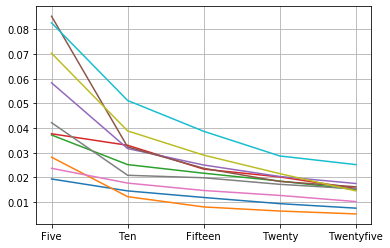

No handles with labels found to put in legend.


In [73]:
import matplotlib.pyplot as plt
for digit in range(10):
    plt.plot(x,degree_3.iloc[:,digit], label = str(digit))
    plt.xticks(x,Epochs)
plt.grid()
plt.show()
plt.legend(loc = 'upper right')
%matplotlib inline

In [100]:
degree_3.iloc[:,0].values.argmin()

4

In [101]:
degree_3.iloc[:,1].values.argmin()

4

In [102]:
degree_3.iloc[:,2].values.argmin()

4

In [103]:
degree_3.iloc[:,3].values.argmin()

4

In [104]:
degree_3.iloc[:,4].values.argmin()

4

In [105]:
degree_3.iloc[:,5].values.argmin()

4

In [106]:
degree_3.iloc[:,6].values.argmin()

4

In [107]:
degree_3.iloc[:,7].values.argmin()

4

In [108]:
degree_3.iloc[:,8].values.argmin()

4

In [109]:
degree_3.iloc[:,9].values.argmin()

4

In [110]:
#25 epoch give the smallest training error for each digit
#S25 is the best predictor for each column (=digit)

# TEST 

In [111]:
test_error = np.zeros(4000)

In [112]:
for point in range(4000):
    y_pred = np.zeros(10)
    for digit in range(10):
        y_pred[digit] = np.sign(np.sum((1+np.dot(x_train[:,:], x_test[point,:]))**3
                *y_train[:,digit]*S25[:,digit]))
    if y_pred.argmax() != y_test[point]:
        test_error[point] = 1 #zero-one loss

In [113]:
np.mean(test_error)
#12% test error 

0.12

In [114]:
S5[:]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 5.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [2., 1., 1., ..., 1., 1., 1.],
       [1., 1., 3., ..., 1., 1., 1.]])

In [115]:
#Create a new predictor that is the average of the five previous predictors
average = np.zeros((6000,10))
average = average + np.array(S5[:]+S10[:]+S15[:]+S20[:]+S25[:]) 
average /= 5

In [116]:
average

array([[1. , 1. , 1. , ..., 1. , 1. , 1. ],
       [1. , 1. , 1. , ..., 1. , 1. , 8.2],
       [1. , 1. , 1. , ..., 1. , 1. , 1. ],
       ...,
       [1. , 1. , 1. , ..., 1. , 1. , 1. ],
       [2. , 1. , 1. , ..., 1. , 1. , 1. ],
       [1. , 1. , 3. , ..., 1. , 1. , 1. ]])

In [117]:
np.savetxt("average_d3.txt", average, delimiter = ',')
pd.read_csv("average_d3.txt", header = None)

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,1.0,6.8,1.0,6.6,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.2
2,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0
3,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,7.0,1.0,11.0,1.0,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5995,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0
5996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,3.4
5997,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
5998,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [118]:
test_error = np.zeros(4000)
for point in range(4000):
    y_pred = np.zeros(10)
    for digit in range(10):
        y_pred[digit] = np.sign(np.sum((1+np.dot(x_train[:,:], x_test[point,:]))**3
                *y_train[:,digit]*average[:,digit]))
    if y_pred.argmax() != y_test[point]:
        test_error[point] = 1 #zero-one loss

In [119]:
np.mean(test_error)
#17.32% test error

0.17325